# Import libraries


In [1]:
import librosa
from IPython.display import Audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
import os

<Figure size 1008x360 with 0 Axes>

In [2]:
amharic_train = 'drive/MyDrive/Week-4-STT/data/AMHARIC/data/train'
amharic_train_wav = os.path.join(amharic_train, 'wav')
amharic_test = 'drive/MyDrive/Week-4-STT/data/AMHARIC/data/test'
amharic_lexicon = 'drive/MyDrive/Week-4-STT/data/AMHARIC/data/train'

In [3]:
!ls drive/MyDrive/Week-4-STT/data/AMHARIC/data/

lexicon.txt  test  train


In [4]:
train_file_names = os.listdir(amharic_train_wav)
train_wav_paths = [os.path.join(amharic_train_wav, file_name) 
                    for file_name in train_file_names]
print(f"We have {len(train_wav_paths)} Amharic wav files in the training set")

We have 10875 Amharic wav files in the training set


In [5]:
x , sr = librosa.load(train_wav_paths[0])
print(f"audio shape: {x.shape} sampling rate: {sr}")#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050


audio shape: (115719,) sampling rate: 22050


In [6]:
Audio(train_wav_paths[0])

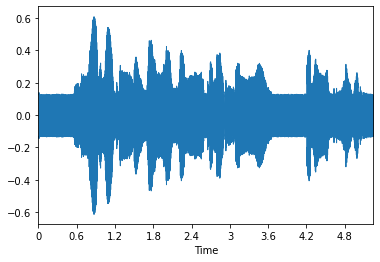

In [7]:
librosa.display.waveplot(x, sr=sr)

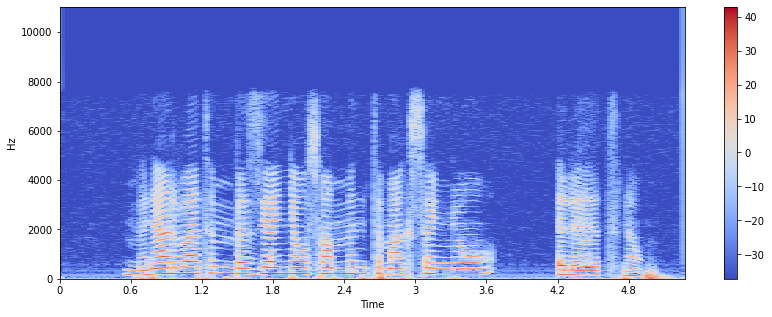

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**The following cell took around 20 minutes. I don't recommend running it.** 

In [ ]:
# shapes = list()
# for path in train_wav_paths:
#   x, sr = librosa.load(path)
#   shapes.append(x.shape[0])

Text(0.5, 1.0, 'Audio lengths')

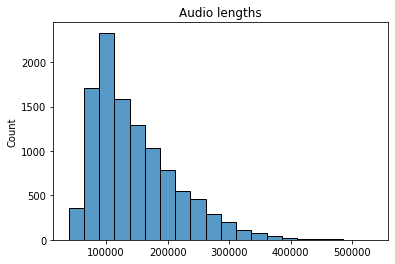

In [ ]:
# import seaborn as sns
# ax = sns.histplot(shapes, bins=20)
# ax.set_title("Audio lengths")

# Let's look at some cleaning techniques

In [ ]:
# librosa.util.fix_length(data: np.Array, size: int, axis)

10875

## Mono to Sterio

There is no native way to do this with librosa, so I am using numpy here

In [69]:
import numpy as np
def convert_to_sterio(audio: np.array) -> np.array:
  if len(audio.shape) == 1:
    sterio = np.stack([audio, audio], axis=1)

    return sterio
  return audio


In [70]:
x , sr = librosa.load(train_wav_paths[10], mono=False)

sterio = convert_to_sterio(x)

In [71]:
sterio.shape, x.shape

((155232, 2), (155232,))

In [72]:
import soundfile as sf
sf.write('sterio.wav', sterio, samplerate=sr)

let's play the two and look for differences

In [43]:
Audio(train_wav_paths[10])

In [73]:
Audio('sterio.wav')